# Machine vision introduction

Required packages and their import.

> pip install numpy matplotlib opencv-python

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

## Creation of dummy image
Image is array of integers.

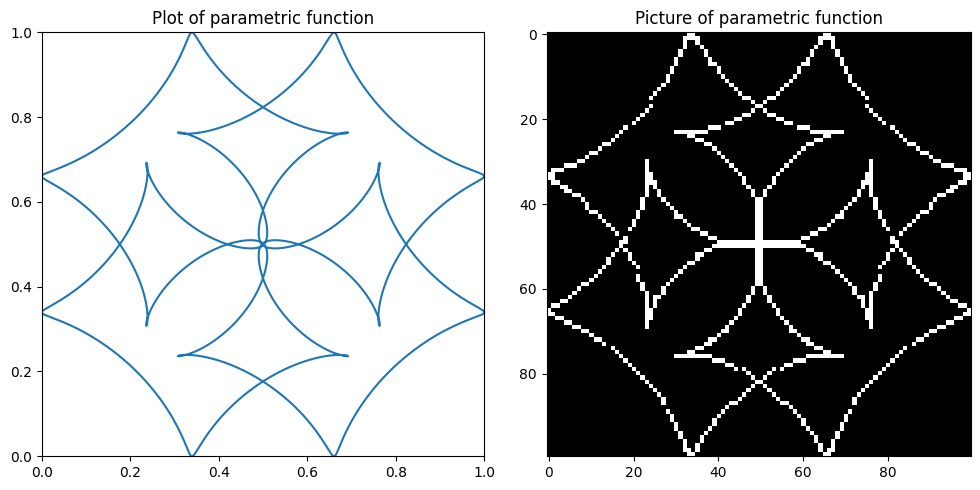

In [2]:
Nt = 1000

a, b, c, d, j, k = 1, 5, 1, 5, 3, 3

t = np.linspace(0, 2*np.pi, Nt)
x = np.cos(a*t) - np.cos(b*t)**j
y = np.sin(c*t) - np.sin(d*t)**k


N = 100
x -= x.min()
y -= y.min() 
x /= x.max()
y /= y.max()

image = np.zeros((N, N), dtype="uint8")

for (xp, yp) in zip(x, y):
    xp = min(int(xp*N), N-1)
    yp = min(int(yp*N), N-1)
    image[int(xp), int(yp)] = 255

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Plot of parametric function")
plt.plot(x,y)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.subplot(1,2,2)
plt.title("Picture of parametric function")
plt.imshow(image, cmap="gray")
plt.tight_layout()
plt.show()

## Working with masks

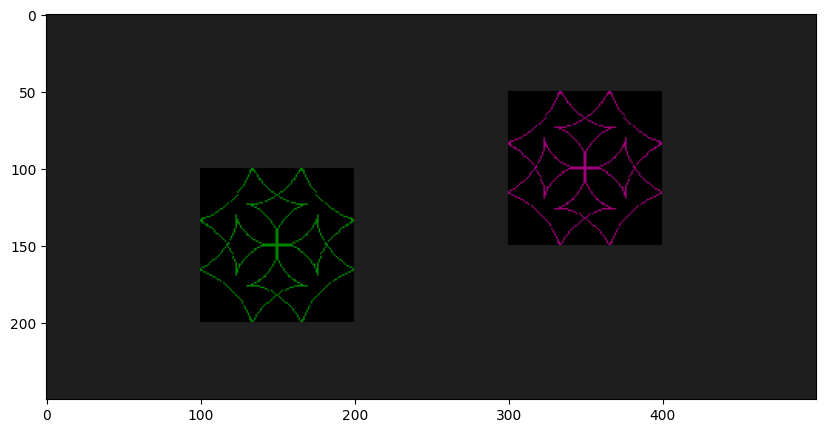

In [3]:
mask = image.copy()
h, w = mask.shape

N = 250
big_image = np.zeros((N, N* 2 , 3), dtype="uint8") + (30, 30, 30)

to_plot = [
    (100, 100, (255, 125, 0)),
    (300, 50, (100, 255, 135)),
]

for xc, yc, color in to_plot:
    for idx, c in enumerate(color):
        big_image[yc:yc+h, xc:xc+w, idx] = mask * c 

plt.figure(figsize=(10,5))
plt.imshow(big_image, cmap="gray")

## Morphological operations

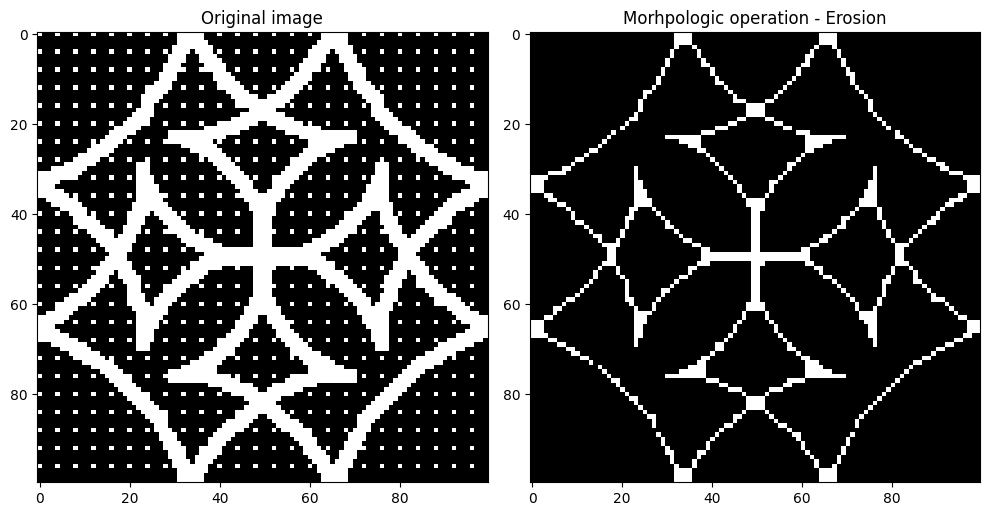

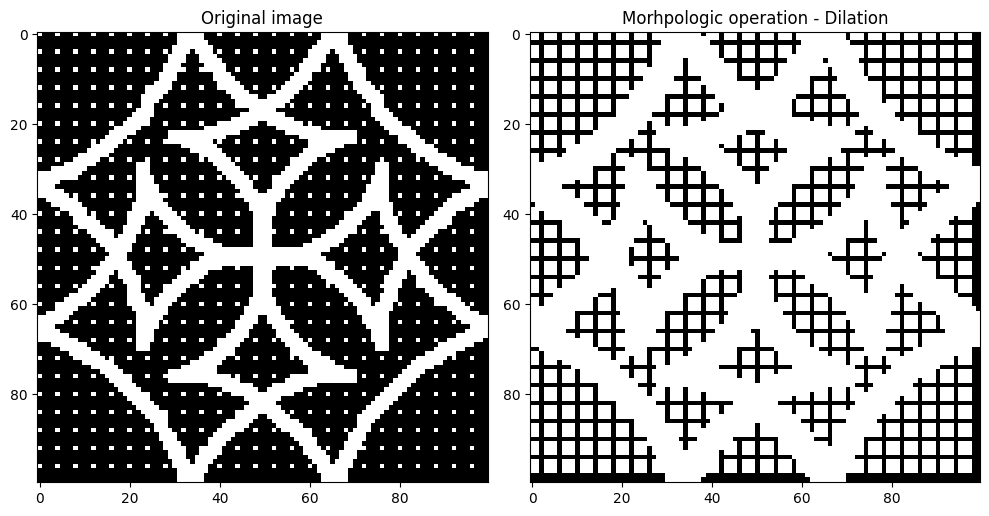

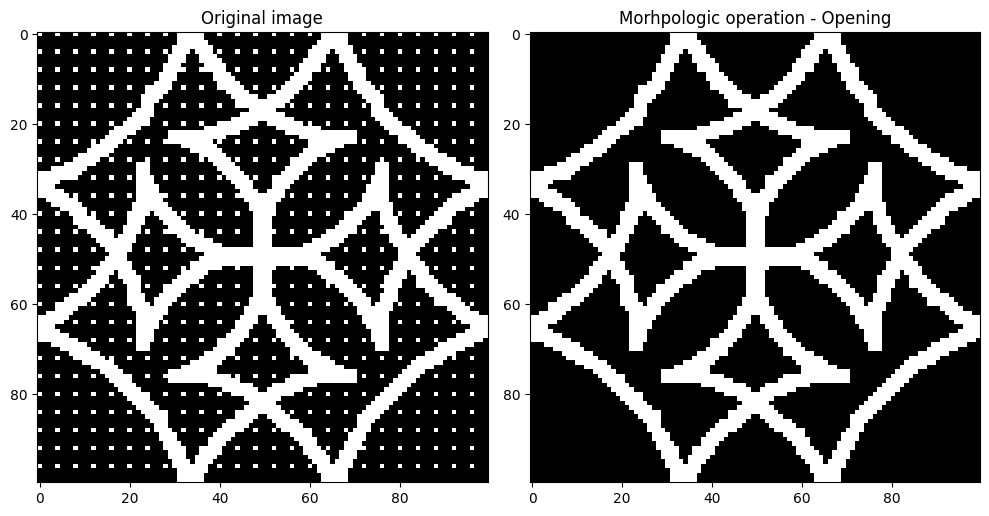

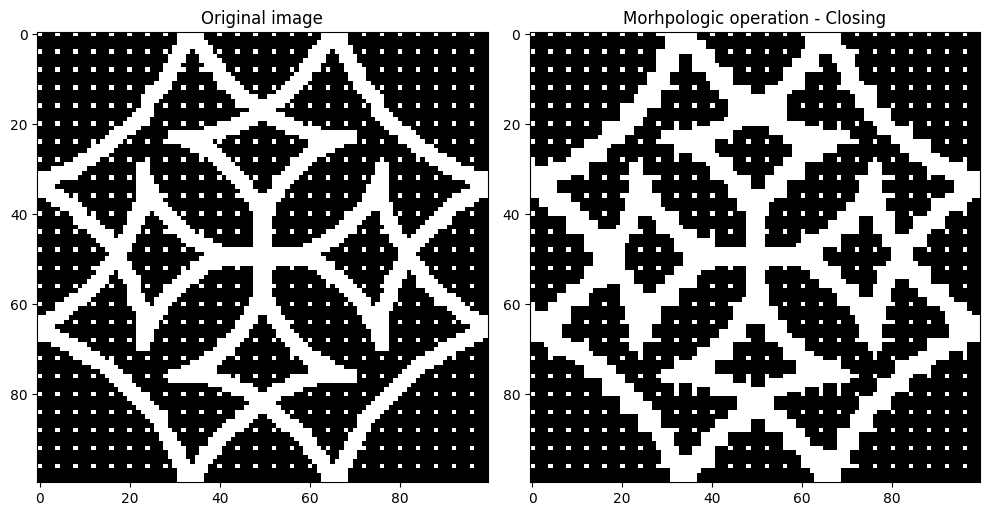

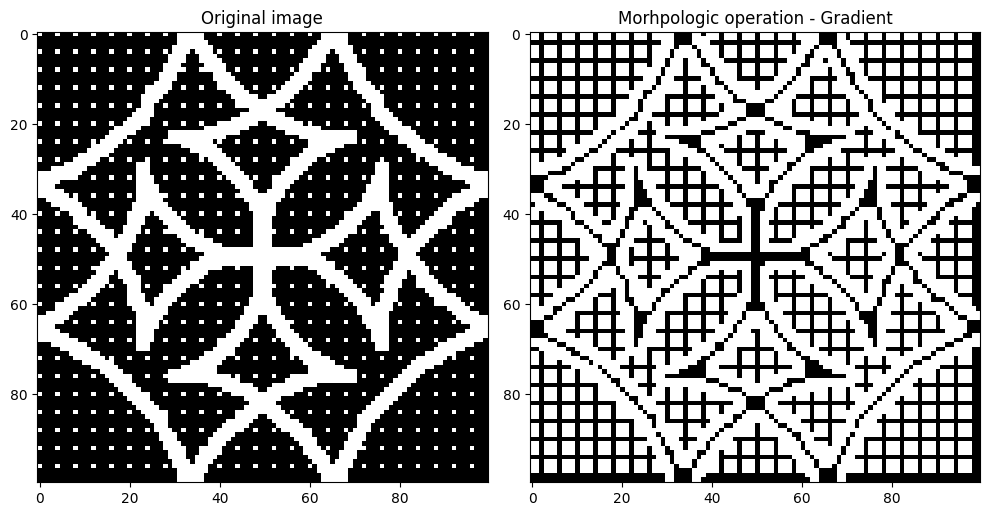

In [4]:
kernel = np.ones((3,3),np.uint8)
orig  = cv2.dilate(image,kernel,iterations = 1)
orig[::4,::4] = 255


operations = (
    ("Erosion", cv2.erode(orig, kernel, iterations=1)),
    ("Dilation", cv2.dilate(orig, kernel, iterations=1)),
    ("Opening", cv2.morphologyEx(orig, cv2.MORPH_OPEN, kernel)),
    ("Closing", cv2.morphologyEx(orig, cv2.MORPH_CLOSE, kernel)),
    ("Gradient", cv2.morphologyEx(orig, cv2.MORPH_GRADIENT, kernel)),
)


for name, img in operations:
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Original image")
    plt.imshow(orig, cmap="gray")
    
    plt.subplot(1,2,2)
    plt.title(f"Morhpologic operation - {name}")
    plt.imshow(img, cmap="gray")
    plt.tight_layout()
    plt.show()

## Thresholding and Edge detection

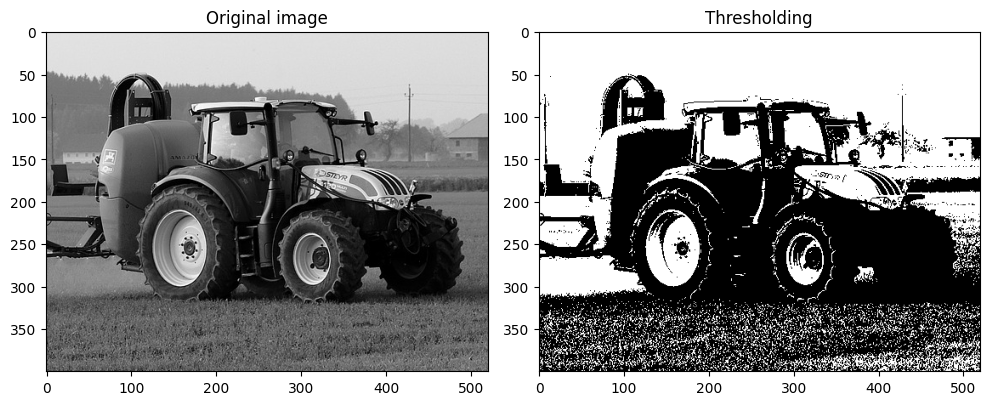

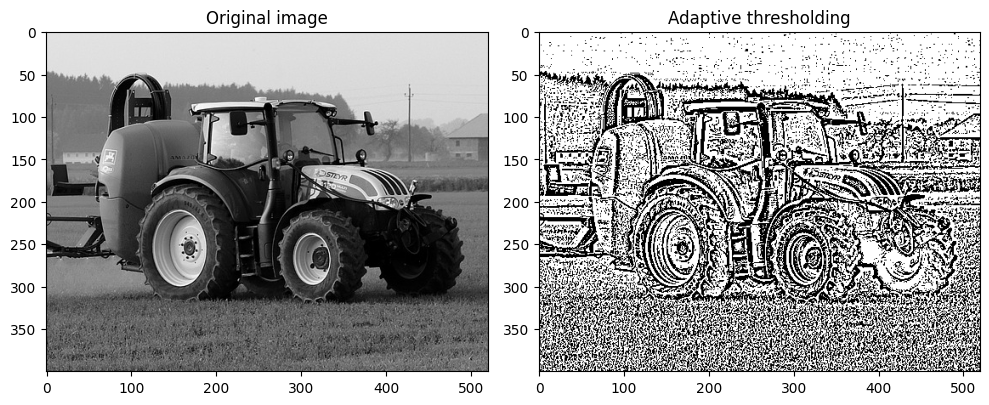

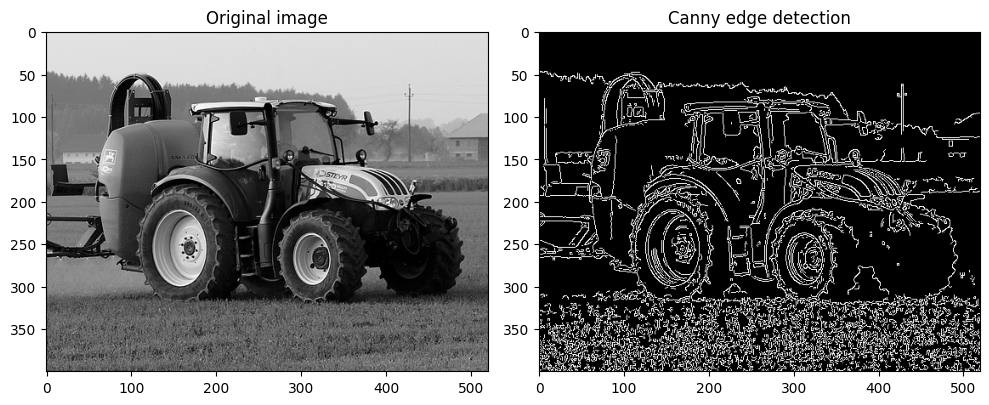

In [5]:
img = cv2.imread("data/sample1.jpg", cv2.IMREAD_GRAYSCALE)[200:600,530:1050]
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


operations = (
    ("Thresholding", cv2.threshold(img,110,255,cv2.THRESH_BINARY)[1]),
    ("Adaptive thresholding", cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)),
    ("Canny edge detection", cv2.Canny(img,100,200)),
)

for name, th in operations:

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Original image")
    plt.imshow(img, cmap="gray")
    
    plt.subplot(1,2,2)
    plt.title(f"{name}")
    plt.imshow(th, cmap="gray")
    plt.tight_layout()
    plt.show()